# Learning objectives:
After doing this exercise, you'll know how to do the following:

Tune the following hyperparameters:
1. learning rate
2. number of epochs
3. batch size

Interpret different kinds of loss curves.

In [2]:
# importing relevant libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

2021-09-19 10:33:06.269218: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-19 10:33:06.269393: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Define functions that build and train a model
The following code defines two functions:

1. build_model(my_learning_rate), which builds an empty model.
2. train_model(model, feature, label, epochs), which trains the model from the examples (feature and label) you pass.

Since you don't need to understand model building code right now, we've hidden this code cell. You may optionally double-click the headline to explore this code.

In [3]:
def build_model(my_learning_rate):
    """Create and compile a simple linear regression model."""
    # Most simple tf.keras models are sequential.
    # A sequential model contains one or more layers.
    model = tf.keras.models.Sequential()

    # Describe the topography of the model.
    # The topography of a simple linear regression model 
    # is a single node in a single layer.
    model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

    # Compile the model topography into code that
    # TensorFlow can efficiently execute. Configure
    # training to minimize the model's mean squared error.
    model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                    loss="mean_squared_error",
                    metrics=[tf.keras.metrics.RootMeanSquaredError()])
    return model

def train_model(model, feature, label, epochs, batch_size):
    """Train the model by feeding it data"""

    # Feed teh feature values and the label values to the model. 
    # The model will train for the specified number
    # of epochs, gradually learning how the feature values
    # relate to the label values.
    history = model.fit(x=feature, y=label, 
                        batch_size=batch_size,
                        epochs=epochs)

    # Gather the trained model's weight and bias.
    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]

    # The list of epochs is stored separately from the
    # rest of history.
    epochs = history.epoch

    # Gather the istory (a snapshot) of each epoch.
    hist = pd.DataFrame(history.history)

    # Specifically gather the model's root mean
    # squared error at each epoch.
    rmse = hist["root_mean_squared_error"]

    return trained_weight, trained_bias, epochs, rmse

print("Defined create_model and train_model")

Defined create_model and train_model


# Define plotting functions
We're using a popular Python library called Matplotlib to create the following two plots:
1. a plot of the feature values vs. the label values, and a line showing the output of the trained model.
2. a loss curve.

We hid the following code cell because learning Matplotlib is not relevant to the learning objectives. Regardless, you must still run all hidden code cells.

In [4]:
def plot_the_model(trained_weight, trained_bias, feature, label):
    """Plot the trained model against the trainng feature and label."""
    
    # Label the axes.
    plt.xlabel("feature")
    plt.ylabel("label")

    # Plot the feature values vs. label values.
    plt.scatter(feature, label)

    # Create a red line representing the model. The red line starts
    # at coordinates (x0, y0) and ends at coodinates (x1, y1).
    x0 = 0
    y0 = trained_bias
    x1 = feature[-1]
    y1 = trained_bias + (trained_weight * x1)
    plt.plot([x0, x1], [y0, y1], c = 'r')

    # Render the scatter plot and the red line.
    plt.show()

def plot_the_loss_curve(epochs, rmse):
    """Plot the loss curve, which shows loss vs. epoch."""

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")

    plt.plot(epochs, rmse, label="Loss")
    plt.legend()
    plt.ylim([rmse.min() * 0.97, rmse.max()])
    plt.show()

print("Defined the plot_the_model and plot_the_loss+curce functions.")

Defined the plot_the_model and plot_the_loss+curce functions.


# Define the dataset
The dataset consists of 12 examples. Each example consists of one feature and one label.

In [5]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

# Specify the hyperparameters
The hyperparameters in this Colab are as follows:
1. learning rate
2. epochs
3. batch_size

The following code cell initializes these hyperparameters and then invokes the functions that build and train the model.

2021-09-19 10:33:11.883293: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-09-19 10:33:11.883395: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-09-19 10:33:11.883434: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (HVG): /proc/driver/nvidia/version does not exist
2021-09-19 10:33:11.883787: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-09-19 10:33:12.010377: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimizati

Epoch 1/10
1/1 [==============================] - 1s 803ms/step - loss: 1238.6351 - root_mean_squared_error: 35.1942
Epoch 2/10
1/1 [==============================] - 0s 18ms/step - loss: 1220.3392 - root_mean_squared_error: 34.9334
Epoch 3/10
1/1 [==============================] - 0s 16ms/step - loss: 1207.1979 - root_mean_squared_error: 34.7448
Epoch 4/10
1/1 [==============================] - 0s 10ms/step - loss: 1196.2725 - root_mean_squared_error: 34.5872
Epoch 5/10
1/1 [==============================] - 0s 13ms/step - loss: 1186.6310 - root_mean_squared_error: 34.4475
Epoch 6/10
1/1 [==============================] - 0s 15ms/step - loss: 1177.8413 - root_mean_squared_error: 34.3197
Epoch 7/10
1/1 [==============================] - 0s 7ms/step - loss: 1169.6630 - root_mean_squared_error: 34.2003
Epoch 8/10
1/1 [==============================] - 0s 8ms/step - loss: 1161.9463 - root_mean_squared_error: 34.0873
Epoch 9/10
1/1 [==============================] - 0s 9ms/step - loss: 115

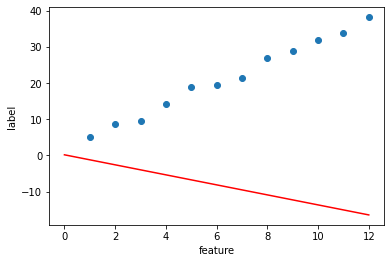

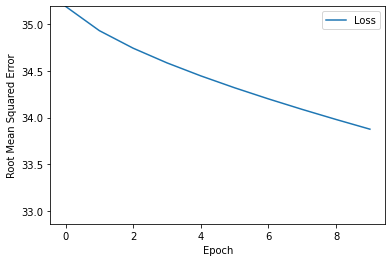

In [6]:
learning_rate = 0.01
epochs = 10
my_batch_size = 12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature,
                                                        my_label, epochs,
                                                        my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

# Task 1: Examine the graphs
Examine the top graph. The blue dots identify the actual data; the red line identifies the output of the trained model. Ideally, the red line should align nicely with the blue dots. Does it? Probably not.

A certain amount of randomness plays into training a model, so you'll get somewhat different results every time you train. That said, unless you are an extremely lucky person, the red line probably doesn't align nicely with the blue dots.

Examine the bottom graph, which shows the loss curve. Notice that the loss curve decreases but doesn't flatten out, which is a sign that the model hasn't trained sufficiently.

# Task 2: Increase the number of epochs
Training loss should steadily decrease, steeply at first, and then more slowly. Eventually, training loss should eventually stay steady (zero slope or nearly zero slope), which indicates that training has converged.

In Task 1, the training loss did not converge. One possible solution is to train for more epochs. Your task is to increase the number of epochs sufficiently to get the model to converge. However, it is inefficient to train past convergence, so don't just set the number of epochs to an arbitrarily high value.

Examine the loss curve. Does the model converge?

Epoch 1/450
1/1 [==============================] - 0s 6ms/step - loss: 37.1984 - root_mean_squared_error: 6.0990
Epoch 2/450
1/1 [==============================] - 0s 7ms/step - loss: 36.3263 - root_mean_squared_error: 6.0271
Epoch 3/450
1/1 [==============================] - 0s 7ms/step - loss: 35.4663 - root_mean_squared_error: 5.9554
Epoch 4/450
1/1 [==============================] - 0s 9ms/step - loss: 34.6182 - root_mean_squared_error: 5.8837
Epoch 5/450
1/1 [==============================] - 0s 12ms/step - loss: 33.7821 - root_mean_squared_error: 5.8122
Epoch 6/450
1/1 [==============================] - 0s 10ms/step - loss: 32.9578 - root_mean_squared_error: 5.7409
Epoch 7/450
1/1 [==============================] - 0s 9ms/step - loss: 32.1455 - root_mean_squared_error: 5.6697
Epoch 8/450
1/1 [==============================] - 0s 11ms/step - loss: 31.3450 - root_mean_squared_error: 5.5987
Epoch 9/450
1/1 [==============================] - 0s 11ms/step - loss: 30.5564 - root_mean_s

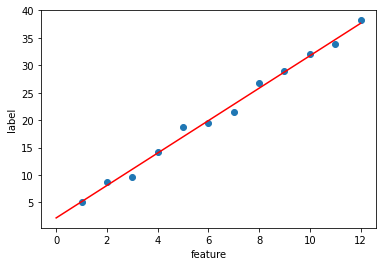

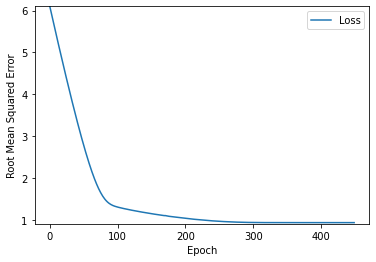

In [8]:
learning_rate = 0.01
epochs = 450
my_batch_size = 12

my_mdel = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model,
                                                            my_feature,
                                                            my_label, 
                                                            epochs,
                                                            my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

# Task 3: Increase the learning rate
In Task 2, you increased the number of epochs to get the model to converge. Sometimes, you can get the model to converge more quickly by increasing the learning rate. However, setting the learning rate too high often makes it impossible for a model to converge. In Task 3, we've intentionally set the learning rate too high. Run the following code cell and see what happens.

Epoch 1/500
1/1 [==============================] - 1s 677ms/step - loss: 321.0314 - root_mean_squared_error: 17.9173
Epoch 2/500
1/1 [==============================] - 0s 14ms/step - loss: 6723553.5000 - root_mean_squared_error: 2592.9817
Epoch 3/500
1/1 [==============================] - 0s 11ms/step - loss: 319.0315 - root_mean_squared_error: 17.8615
Epoch 4/500
1/1 [==============================] - 0s 7ms/step - loss: 2.0713 - root_mean_squared_error: 1.4392
Epoch 5/500
1/1 [==============================] - 0s 11ms/step - loss: 0.8920 - root_mean_squared_error: 0.9445
Epoch 6/500
1/1 [==============================] - 0s 9ms/step - loss: 0.8757 - root_mean_squared_error: 0.9358
Epoch 7/500
1/1 [==============================] - 0s 8ms/step - loss: 0.8752 - root_mean_squared_error: 0.9355
Epoch 8/500
1/1 [==============================] - 0s 12ms/step - loss: 0.8751 - root_mean_squared_error: 0.9355
Epoch 9/500
1/1 [==============================] - 0s 9ms/step - loss: 0.8751 - roo

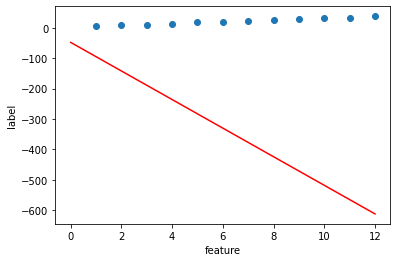

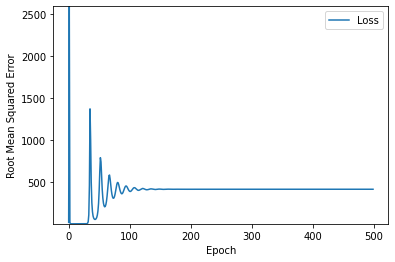

In [9]:
# Increase the learning rate and decrease the number of epochs.
learning_rate=100 
epochs=500 

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

The resulting model is terrible; the red line doesn't align with the blue dots. Furthermore, the loss curve oscillates like a roller coaster. An oscillating loss curve strongly suggests that the learning rate is too high.

# Task 4: Find the ideal combination of epochs and learning rate
Assign values to the following two hyperparameters to make training converge as efficiently as possible:
1. learning_rate
2. epochs

Epoch 1/300
1/1 [==============================] - 1s 560ms/step - loss: 487.7190 - root_mean_squared_error: 22.0844
Epoch 2/300
1/1 [==============================] - 0s 14ms/step - loss: 203.4415 - root_mean_squared_error: 14.2633
Epoch 3/300
1/1 [==============================] - 0s 10ms/step - loss: 97.4956 - root_mean_squared_error: 9.8740
Epoch 4/300
1/1 [==============================] - 0s 9ms/step - loss: 47.9901 - root_mean_squared_error: 6.9275
Epoch 5/300
1/1 [==============================] - 0s 7ms/step - loss: 23.5590 - root_mean_squared_error: 4.8538
Epoch 6/300
1/1 [==============================] - 0s 10ms/step - loss: 11.4821 - root_mean_squared_error: 3.3885
Epoch 7/300
1/1 [==============================] - 0s 7ms/step - loss: 5.6496 - root_mean_squared_error: 2.3769
Epoch 8/300
1/1 [==============================] - 0s 7ms/step - loss: 2.9375 - root_mean_squared_error: 1.7139
Epoch 9/300
1/1 [==============================] - 0s 8ms/step - loss: 1.7352 - root_mean

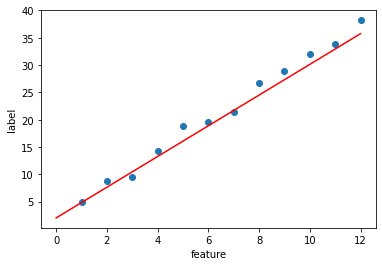

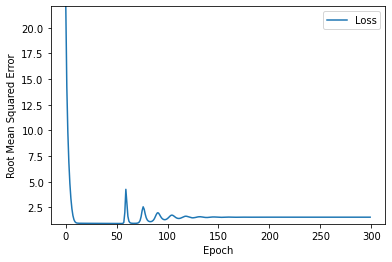

In [10]:
# Set the learning rate and number of epochs
learning_rate= 0.3  
epochs= 300   

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)